**Introduction to Apache MXNet - NDArray API, AutoGrad API, and Optimizer API**

In [2]:
!pip install mxnet

     |████████████████████████████████| 68.7MB 75kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
from mxnet import ndarray as nda

In [4]:
# Create CPU array
arr_one = nda.ones((2, 2))
print(arr_one)


[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)>


In [5]:
arr_x = nda.zeros((3, 5))
print(arr_x)


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<NDArray 3x5 @cpu(0)>


In [6]:
arr_y = nda.random_normal(0, 1, shape=(2,2))
print(arr_y)


[[2.2122064 0.7740038]
 [1.0434403 1.1839255]]
<NDArray 2x2 @cpu(0)>


In [7]:
arr_y.shape

(2, 2)

In [8]:
arr_y.size

4

In [9]:
arr_y[0:2,]


[[2.2122064 0.7740038]
 [1.0434403 1.1839255]]
<NDArray 2x2 @cpu(0)>

In [10]:
arr_y[1,:]


[1.0434403 1.1839255]
<NDArray 2 @cpu(0)>

In [11]:
arr_y[0,1]


[0.7740038]
<NDArray 1 @cpu(0)>

In [12]:
from mxnet import ndarray as nda
arr_z=nda.random.randint(1,5,shape=(2,3))
print(arr_z,end="")
arr_y=nda.random.randint(1,5,shape=(2,3))
print(arr_y)
print("\n Transpose of arr_y:",arr_y.T)
print("\n Addition of arr_y and arr_z:",arr_y+arr_z)
print("\n Multiplication of arr_y and arr_z:",arr_y*arr_z)


[[4 3 4]
 [1 1 2]]
<NDArray 2x3 @cpu(0)>
[[4 3 2]
 [2 1 1]]
<NDArray 2x3 @cpu(0)>

 Transpose of arr_y: 
[[4 2]
 [3 1]
 [2 1]]
<NDArray 3x2 @cpu(0)>

 Addition of arr_y and arr_z: 
[[8 6 6]
 [3 2 3]]
<NDArray 2x3 @cpu(0)>

 Multiplication of arr_y and arr_z: 
[[16  9  8]
 [ 2  1  2]]
<NDArray 2x3 @cpu(0)>


In [13]:
arr_p = arr_z.asnumpy()
print(arr_p)
type(arr_p)

[[4 3 4]
 [1 1 2]]


numpy.ndarray

In [14]:
arr_k = nda.array(arr_p)
print(arr_k)


[[4. 3. 4.]
 [1. 1. 2.]]
<NDArray 2x3 @cpu(0)>


In [15]:
import mxnet as mx
from mxnet import ndarray as nda
from mxnet import autograd
var = nda.array([4])
var.attach_grad()
with autograd.record():
 res=(2*(var**3))+(4*var)
res.backward()
print(var.grad)


[100.]
<NDArray 1 @cpu(0)>


In [17]:
from mxnet import gluon as gl
from mxnet import optimizer
neu_network=gl.nn.Dense(1)
neu_network.initialize()
print(neu_network)
optim_nn=optimizer.SGD(learning_rate=0.01)
print(optim_nn)
nn_trainer=gl.Trainer(neu_network.collect_params(),optimizer=optim_nn)
print(nn_trainer)

Dense(None -> 1, linear)


**Practical Implementation of Neural Network with Apache MXNet**

In [20]:
from mxnet import nd, autograd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
iris_data="https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(iris_data, delimiter=',', header = 0)
print(df.shape)

(150, 5)


In [21]:
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


In [22]:
new_df=pd.get_dummies(df)
print(new_df.head(10))

   sepal_length  sepal_width  ...  species_versicolor  species_virginica
0           5.1          3.5  ...                   0                  0
1           4.9          3.0  ...                   0                  0
2           4.7          3.2  ...                   0                  0
3           4.6          3.1  ...                   0                  0
4           5.0          3.6  ...                   0                  0
5           5.4          3.9  ...                   0                  0
6           4.6          3.4  ...                   0                  0
7           5.0          3.4  ...                   0                  0
8           4.4          2.9  ...                   0                  0
9           4.9          3.1  ...                   0                  0

[10 rows x 7 columns]


In [23]:
train_data, test_data = train_test_split( new_df,
test_size=0.3, random_state=1)
print(train_data.shape)
print(test_data.shape)

(105, 7)
(45, 7)


In [0]:
features =['sepal_width','petal_length','petal_width','species_setosa','species_versicolor','species_virginica']
y_train = nd.array(train_data['sepal_length'])
X_train = nd.array(train_data[features])
y_test = nd.array(test_data['sepal_length'])
X_test = nd.array(test_data[features])


In [0]:
learn_rate = 0.02
epochs = 200
X_features = nd.array(X_train)
target_y = nd.array(y_train)
columns = X_features.shape[1]
weights = nd.random.normal(shape = [columns, 1])
bias = nd.random.normal(shape = 1)
paras = [weights,bias]
for x in paras: x.attach_grad()
def gradient_calc(paras,lr):
    for x in paras:
      x[:] = x - x.grad * lr
loss_data = []

Epoch 199, Mean loss: 
[1.2463726]
<NDArray 1 @cpu(0)>
Mean Squared Error on Test Set: 
[0.9783383]
<NDArray 1 @cpu(0)>


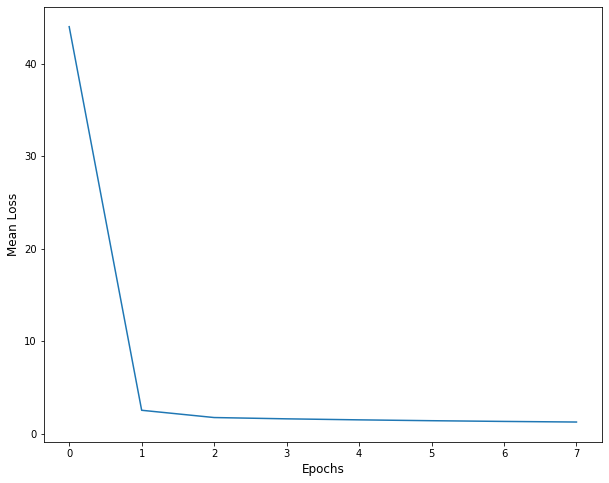

In [35]:
for epoch in range(epochs):
  with autograd.record():
    loss=nd.mean((nd.dot(X_train, weights) + bias -y_train)**2)
loss.backward()
gradient_calc(paras, learn_rate)
print ("Epoch %s, Mean loss: %s" % (epoch,loss))
loss_data.append(loss.asscalar())
plt.figure(num=None,figsize=(10,8))
plt.plot(loss_data)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Mean Loss',fontsize=12)
MSE = nd.mean(((nd.dot(X_test, weights) + bias) - y_test)**2)
print ("Mean Squared Error on Test Set: %s" % (MSE))